### K 평균 군집분석(K-means Clustering)

- k개의 집단으로 데이터를 분류하는 알고리즘
- 찾아야 하는 결과값을 몰라도 적용할 수 있는 방법(비지도 학습 : Unsupervised Learning)
- 파라미터로 전달 받은 군집의 수 k에 따라 각각의 군집의 중심점을 기준으로 분류 입니다.
- 각 군집에 속하는 데이터들 간의 응집도를 최대로(거리를 최소화하는) k개의 군집으로 분할
    - 분할하고자 하는 k개의 군집 개수를 파라미터로 전달
    - 각 군집별 중심과 군집 내 데이터 간의 거리 제곱합을 최소로 하는 군집을 찾는 것이 알고리즘의 주 목표
    - 임의로 선택한 k개의 중심점을 기준으로 분할 한 후 각각의 데이터에 대해 가장 가까운 중심에 연결지어 분할하고 이 작업을 반복
    - 소속 군집이 변경되지 않거나 중심점이 변하지 않는 상태가 되면 반복을 중지하여 종료
    - 초기값(입력한 k값)에 따라 클러스터링 결과가 극명하게 달라짐
    - 구형 분포를 가진 데이터에 대해서 군집을 생성하여 분할하는데 적합
- 입력 변수에 대한 정규화 필요
    - 값의 단위가 다를 경우 값이 큰 특정 변수에 의해 결과값이 치우칠 수 있음
    - 입력변수를 스케일링, 정규화 하는 작업 필요
- 인덱스 형식의 군집 레이블이 생성되며 학습이 반복될 때 마다 임의로 변경될 수 있음
- 군집의 개수를 입력해야 하고 중심점의 초기값을 임의로 지정한다는 점에서 오분류 가능성이 높은 취약점

In [1]:
# pandas,matplotlib, seaborn 라이브러리 불러오기
# sklearn : KMeans 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# iris 데이터셋 적재
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
# species
# ['setosa', 'versicolor', 'virginica'] => 0, 1, 2
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
map_dict = {}
for i,s in enumerate(iris['species'].unique()):
    map_dict[s] = i

In [6]:
map_dict

{'setosa': 0, 'versicolor': 1, 'virginica': 2}

In [7]:
iris['species'] = iris['species'].map(map_dict)

In [8]:
iris['species'].head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [10]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
# 데이터셋 추출
# 독립변수 중에서 관계 및 특성을 파악할 변수 2개 추출
sample1 = iris[['sepal_length', 'petal_length']]

In [9]:
# KMeans 모델 생성
# 모델 객체 생성
# fit
# predict
# 초기값 : 3개
model = KMeans(n_clusters=3)

In [12]:
# 모델 학습
model.fit(sample1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
# 모델 예측결과 반환
result1 = model.predict(sample1)

In [17]:
iris['species'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int64)

In [15]:
sample1.shape

(150, 2)

In [14]:
result1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

#### 아래 단계(라벨 인코딩 ~ 정확도)까지는 KMeans Clustering 에서 유효하지 않은 결과

In [18]:
# 라벨 인코딩
model_pred = pd.Series(result1)

In [20]:
# 문제점
# 비지도 학습의 라벨링이기 때문에 실제 값과 라벨이 다르다.
model_pred = model_pred.map({1:0, 2:1, 0:2})

In [23]:
# 예측값 
pred = model_pred.values

In [24]:
# 실제 라벨
true = iris['species'].values

In [25]:
# 정확도를 구할 수 있는 기능을 제공하는  라이브러리
from sklearn import metrics

metrics.adjusted_rand_score(pred, true)

0.6988627672348092

In [31]:
# 입력변수 데이터와 KMeans 결과 데이터 합치기
sample1['cluster'] = pred

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [32]:
sample1.head()

,sepal_length,petal_length,cluster
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0


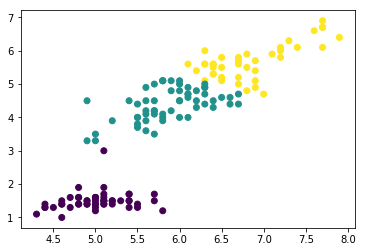

In [34]:
# (연습문제) 입력변수에 대한 산점도 시각화
# 분류된 결과를 입력변수에 반영하여 시각화하기
plt.scatter(sample1['sepal_length'], sample1['petal_length'], 
           c=sample1['cluster'])

In [35]:
# 군집 중심점 시각화
model.cluster_centers_

array([[6.83902439, 5.67804878],
       [5.00784314, 1.49215686],
       [5.87413793, 4.39310345]])

In [37]:
centers = pd.DataFrame(model.cluster_centers_, 
                       columns=sample1.columns[:-1])
centers

,sepal_length,petal_length
0,6.839024,5.678049
1,5.007843,1.492157
2,5.874138,4.393103


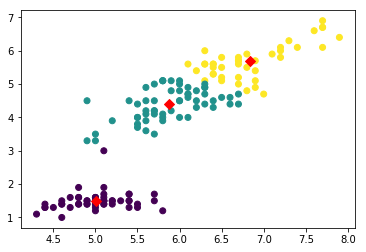

In [39]:
# step1, 군집 결과 시각화
# step2, 군집의 중심점 시각화
plt.scatter(sample1['sepal_length'], sample1['petal_length'],
           c=sample1['cluster'])
# 마커 크기 : 50, 마커 모양 : 다이아몬드, 마커 색상 : 빨강
plt.scatter(centers['sepal_length'], centers['petal_length'],
           s=50, marker='D', c='r')

### Inertia value

- KMeansModel.inertia_
- 군집의 응집도
    - 각 중심점에서 군집 내 데이타간의 거리 합산 값
    - 적정 군집수를 판단하기 위한 계수
    - 값이 작을 수록 응집도가 높고 군집이 잘된 분할
    - 여러 개의 k값을 비교할 때 inertia 값의 변화가 줄어드는 구간부터 완성된 군집을 이루었다고 해석

In [40]:
model.inertia_

53.809978644106934

In [44]:
# (연습문제) 1개부터 10개까지의 초기값 생성 및 KMeans 적용
inertias = []
for i in range(1,11):
    model = KMeans(n_clusters=i)
    model.fit(sample1)
    inertias.append(model.inertia_)

In [45]:
inertias

[657.8270666666666,
 138.75467418790117,
 53.809978644106934,
 40.20130487804879,
 26.776689655172415,
 23.071003797551775,
 19.298536015801034,
 16.86001324824601,
 14.532588915470498,
 12.800635281385285]

In [46]:
k_list = range(1,11)

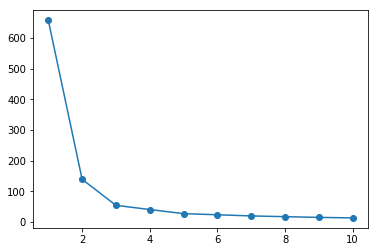

In [48]:
# (연습문제) k 값과 inertias 값에 대한 시각화(라인 플롯)
plt.plot(k_list, inertias, 'o-')

In [62]:
t = pd.DataFrame({'inertia' : inertias,
                  'diff' : diff})
t

,inertia,diff
0,657.827067,657.827067
1,138.754674,519.072392
2,53.809979,84.944696
3,40.201305,13.608674
4,26.776690,13.424615
5,23.071004,3.705686
6,19.298536,3.772468
7,16.860013,2.438523
8,14.532589,2.327424
9,12.800635,1.731954


In [65]:
t['diff'] / t['diff'].sum()

0    0.504913
1    0.398412
2    0.065199
3    0.010445
4    0.010304
5    0.002844
6    0.002896
7    0.001872
8    0.001786
9    0.001329
Name: diff, dtype: float64

In [60]:
diff = []
for i in range(10):
    if i == 0:
        diff.append(inertias[i])
    else :
        diff.append(abs(inertias[i] - inertias[i-1]))

In [61]:
diff

[657.8270666666666,
 519.0723924787654,
 84.94469554379424,
 13.608673766058146,
 13.424615222876373,
 3.70568585762064,
 3.7724677817507413,
 2.4385227675550247,
 2.327424332775511,
 1.7319536340852135]

In [53]:
inertias

[657.8270666666666,
 138.75467418790117,
 53.809978644106934,
 40.20130487804879,
 26.776689655172415,
 23.071003797551775,
 19.298536015801034,
 16.86001324824601,
 14.532588915470498,
 12.800635281385285]

In [52]:
diff

[519.0723924787654,
 84.94469554379424,
 13.608673766058146,
 13.424615222876373,
 3.70568585762064,
 3.7724677817507413,
 2.4385227675550247,
 2.327424332775511,
 1.7319536340852135,
 0]

### 파이프라인

- 스케일링을 적용하여 데이터 변환
- 스케일된 데이터를 모델에 입력하여 학습
- 위의 두 단계를 따로 따로 실행하지 않고 sklearn.pipeline 을 이용하여 쉽게 구현 가능
-  pipeline.fit과 pipeline.predict 메서드를 이용하여 모델을 학습 시키고 예측 수행

In [ ]:
# 일반적인 객체 사용 순서
# 스케일링 객체 생성
# 스케일링 객체에 데이터를 넣고 변환시킨 값 저장
# 변환시킨 값을 모델 객체에 넣고 학습시킨 후 예측/분류 수행

In [66]:
# pipeline, scaler 라이브러리 불러오기
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [67]:
# scaler 객체 생성
scaler = StandardScaler()

In [68]:
# K-means 모델 생성
model = KMeans(n_clusters=3)

In [69]:
# scaler, model을 순차적으로 실행하는 pipeline 생성
pipe = make_pipeline(scaler, model)

In [70]:
# pipeline으로 전처리 후 모델 학습을 동시에 실행
pipe.fit(sample1)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('kmeans', KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0))])

In [71]:
pipe_pred = pipe.predict(sample1)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [72]:
# 예측값 확인
pipe_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])